## 2.1.2. B√†i l√†m m·∫´u  
### B√†i to√°n 1: X√¢y d·ª±ng c√¢y quy·∫øt ƒë·ªãnh v√† r·ª´ng c√¢y v·ªõi d·ªØ li·ªáu "Default of Credit Card Clients"
---
**Ngu·ªìn d·ªØ li·ªáu:** [https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset](https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset)

#### Nhi·ªám v·ª• 1: X√¢y d·ª±ng c√¢y quy·∫øt ƒë·ªãnh b·∫±ng th∆∞ vi·ªán Scikit-Learn

### 1. C√†i ƒë·∫∑t v√† import c√°c th∆∞ vi·ªán c·∫ßn thi·∫øt

In [2]:
!pip install numpy pandas matplotlib scikit-learn graphviz


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split

%matplotlib inline
mpl.rcParams['figure.dpi'] = 100

### 2. N·∫°p d·ªØ li·ªáu v√† lo·∫°i b·ªè c√°c bi·∫øn kh√¥ng c·∫ßn thi·∫øt

In [4]:
import pandas as pd
df = pd.read_csv('UCI_Credit_Card.csv')
df.head()
features_response = df.columns.tolist()

items_to_remove = [
    'ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
    'EDUCATION_CAT', 'graduate school', 'high school', 'none',
    'others', 'university'
]

features_response = [item for item in features_response if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default.payment.next.month']

### 3. Chu·∫©n b·ªã d·ªØ li·ªáu cho t·∫≠p train v√† t·∫≠p test

In [5]:
from sklearn.model_selection import train_test_split
from sklearn import tree

X_train, X_test, y_train, y_test = train_test_split(
    df[features_response[:-1]].values,
    df['default.payment.next.month'].values,
    test_size=0.2,
    random_state=24
)

### 4. X√¢y d·ª±ng c√¢y quy·∫øt ƒë·ªãnh t·ª´ l·ªõp DecisionTreeClassifier c√≥ trong th∆∞ vi·ªán Scikit-Learn

In [6]:
dt = tree.DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

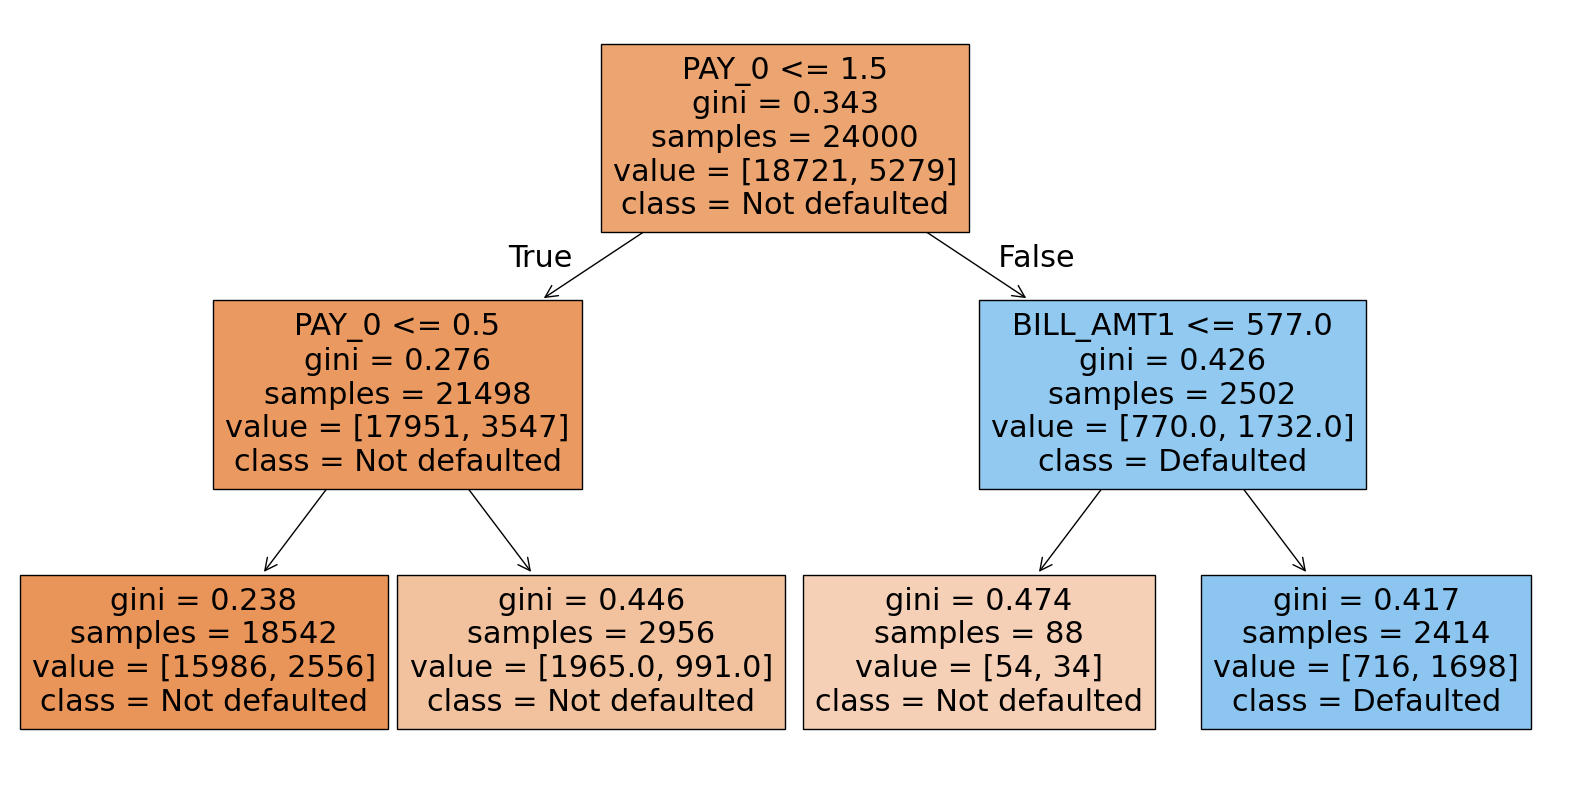

In [7]:
import graphviz
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
tree.plot_tree(
    dt,
    feature_names=features_response[:-1],
    class_names=['Not defaulted', 'Defaulted'],
    filled=True
)
plt.savefig("decision_tree.png", dpi=300, bbox_inches='tight')
plt.show()

### Nhi·ªám v·ª• 2: T√¨m tham s·ªë t·ªëi ∆∞u cho c√¢y quy·∫øt ƒë·ªãnh b·∫±ng GridSearchCV v√† v·∫Ω bi·ªÉu ƒë·ªì ƒë√°nh gi√° m√¥ 


### 1. Chu·∫©n b·ªã d·ªØ li·ªáu

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split

%matplotlib inline
mpl.rcParams['figure.dpi'] = 100

In [9]:
import pandas as pd
df = pd.read_csv('UCI_Credit_Card.csv')
df.head()
features_response = df.columns.tolist()

items_to_remove = [
    'ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
    'EDUCATION_CAT', 'graduate school', 'high school', 'none',
    'others', 'university'
]

features_response = [item for item in features_response if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default.payment.next.month']

In [10]:
from sklearn.model_selection import train_test_split
from sklearn import tree

X_train, X_test, y_train, y_test = train_test_split(
    df[features_response[:-1]].values,
    df['default.payment.next.month'].values,
    test_size=0.2,
    random_state=24
)

### 2. T·∫°o c√¢y quy·∫øt ƒë·ªãnh v√† x√°c ƒë·ªãnh c√°c gi√° tr·ªã tham s·ªë c√≥ th·ªÉ ch·ªçn ƒë·ªÉ t√¨m tham s·ªë t·ªëi ∆∞u

In [11]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth': [1, 2, 4, 6, 8, 10, 12]}
dt = tree.DecisionTreeClassifier(random_state=24)

cv = GridSearchCV(
    dt,
    param_grid=params,
    scoring='roc_auc',       
    n_jobs=None,
    refit=True,
    cv=4,                     
    verbose=1,
    error_score=np.nan,
    return_train_score=True
)

cv.fit(X_train, y_train)

Fitting 4 folds for each of 7 candidates, totalling 28 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=24),
             param_grid={'max_depth': [1, 2, 4, 6, 8, 10, 12]},
             return_train_score=True, scoring='roc_auc', verbose=1)

## Gi·∫£i th√≠ch tham s·ªë:

scoring='roc_auc': d√πng di·ªán t√≠ch d∆∞·ªõi ƒë∆∞·ªùng cong ROC ƒë·ªÉ ƒë√°nh gi√°

cv=4: chia d·ªØ li·ªáu th√†nh 4 ph·∫ßn ƒë·ªÉ cross-validation

return_train_score=True: l∆∞u c·∫£ ƒëi·ªÉm train ƒë·ªÉ so s√°nh bias v√† variance

### 3. V·∫Ω bi·ªÉu ƒë·ªì ƒë√°nh gi√° m√¥ h√¨nh v·ªõi c√°c tham s·ªë chi·ªÅu s√¢u c·ªßa c√¢y kh√°c nhau

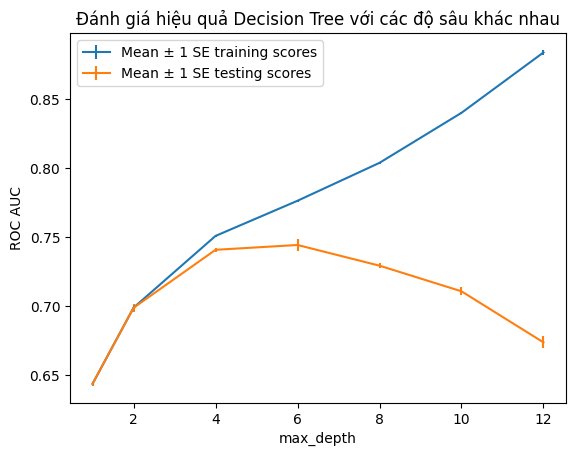

**H√¨nh 2.2**: Bi·ªÉu ƒë·ªì ƒë√°nh gi√° hi·ªáu qu·∫£ th·ª±c hi·ªán c√¢y quy·∫øt ƒë·ªãnh v·ªõi c√° chi·ªÅu s√¢u kh√°c nhau.

In [12]:
cv_results_df = pd.DataFrame(cv.cv_results_)
cv_results_df[['param_max_depth', 'mean_train_score', 'mean_test_score']].head()

ax = plt.axes()

# V·∫Ω ƒë∆∞·ªùng train
ax.errorbar(
    cv_results_df['param_max_depth'],
    cv_results_df['mean_train_score'],
    yerr=cv_results_df['std_train_score']/np.sqrt(4),
    label='Mean ¬± 1 SE training scores'
)

# V·∫Ω ƒë∆∞·ªùng test
ax.errorbar(
    cv_results_df['param_max_depth'],
    cv_results_df['mean_test_score'],
    yerr=cv_results_df['std_test_score']/np.sqrt(4),
    label='Mean ¬± 1 SE testing scores'
)

ax.legend()
plt.xlabel('max_depth')
plt.ylabel('ROC AUC')
plt.title('ƒê√°nh gi√° hi·ªáu qu·∫£ Decision Tree v·ªõi c√°c ƒë·ªô s√¢u kh√°c nhau')
plt.savefig("decision_tree_depth.png", dpi=300, bbox_inches='tight')
plt.show()

from IPython.display import Markdown, display
display(Markdown("**H√¨nh 2.2**: Bi·ªÉu ƒë·ªì ƒë√°nh gi√° hi·ªáu qu·∫£ th·ª±c hi·ªán c√¢y quy·∫øt ƒë·ªãnh v·ªõi c√° chi·ªÅu s√¢u kh√°c nhau."))

### Nhi·ªám v·ª• 3: Nhi·ªám v·ª• 3: X√¢y d·ª±ng r·ª´ng c√¢y (random forest)

## 1. Th·ª±c hi·ªán 1, 2 v√† 3 nh∆∞ ·ªü nhi·ªám v·ª• 1 ƒë·ªÉ t·∫£i th∆∞ vi·ªán, n·∫°p d·ªØ li·ªáu v√† chu·∫©n b·ªã d·ªØ li·ªáu

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split

%matplotlib inline
mpl.rcParams['figure.dpi'] = 100

In [14]:
import pandas as pd
df = pd.read_csv('UCI_Credit_Card.csv')
df.head()
features_response = df.columns.tolist()

items_to_remove = [
    'ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
    'EDUCATION_CAT', 'graduate school', 'high school', 'none',
    'others', 'university'
]

features_response = [item for item in features_response if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default.payment.next.month']

In [15]:
from sklearn.model_selection import train_test_split
from sklearn import tree

X_train, X_test, y_train, y_test = train_test_split(
    df[features_response[:-1]].values,
    df['default.payment.next.month'].values,
    test_size=0.2,
    random_state=24
)

## 2. T·∫°o r·ª´ng c√¢y v·ªõi l·ªõp RandomForestClassifier trong Scikit-Learn

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier\
 (n_estimators=10, criterion='gini', max_depth=3,
 min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
 max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0,
 bootstrap=True, oob_score=False, n_jobs=None,
 random_state=4, verbose=0, warm_start=False, class_weight=None)

## 3. T√¨m tham s·ªë t·ªëi ∆∞u cho m√¥ h√¨nh r·ª´ng c√¢y v√† th·ª±c hi·ªán train v·ªõi tham s·ªë t·ªëi ∆∞u ƒë√≥

In [17]:
from sklearn.model_selection import GridSearchCV

rf_params_ex = {'n_estimators': list(range(10, 110, 10))}

cv_rf_ex = GridSearchCV(
    rf,
    param_grid=rf_params_ex,
    scoring='roc_auc',
    refit=True,
    cv=4,
    verbose=1,
    error_score=np.nan,
    return_train_score=True
)

cv_rf_ex.fit(X_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(max_depth=3, n_estimators=10,
                                              random_state=4),
             param_grid={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]},
             return_train_score=True, scoring='roc_auc', verbose=1)

## 4. V·∫Ω bi·ªÉu ƒë·ªì ƒë√°nh gi√° m√¥ h√¨nh r·ª´ng c√¢y v·ªõi c√°c tham s·ªë s·ªë c√¢y c√≥ trong r·ª´ng kh√°c nhau

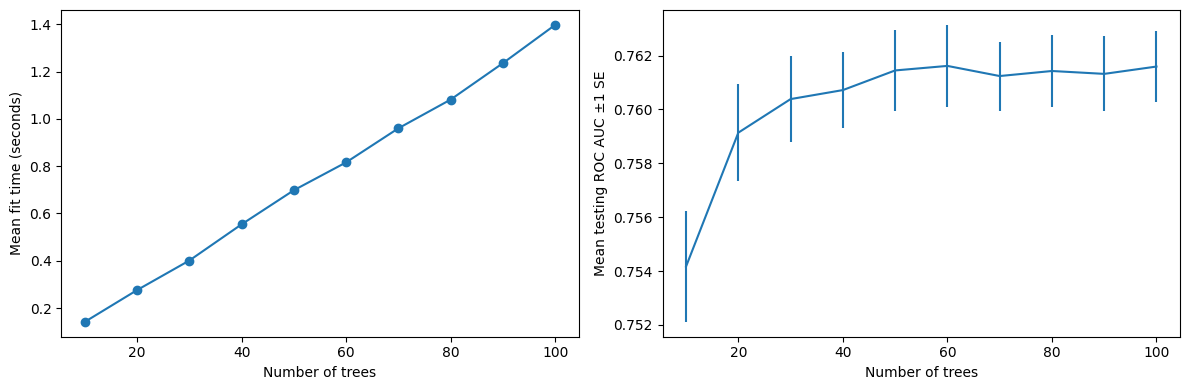

**H√¨nh 2.3**: Bi·ªÉu ƒë·ªì th·ªÉ hi·ªán m·ªëi quan h·ªá gi·ªØa s·ªë c√¢y v·ªõi Mean Fit Time v√† Mean Testing ROC AUC.

In [18]:
cv_rf_ex_results_df = pd.DataFrame(cv_rf_ex.cv_results_)

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Bi·ªÉu ƒë·ªì 1: Mean fit time
axs[0].plot(
    cv_rf_ex_results_df['param_n_estimators'],
    cv_rf_ex_results_df['mean_fit_time'],
    '-o'
)
axs[0].set_xlabel('Number of trees')
axs[0].set_ylabel('Mean fit time (seconds)')

# Bi·ªÉu ƒë·ªì 2: Mean testing ROC AUC
axs[1].errorbar(
    cv_rf_ex_results_df['param_n_estimators'],
    cv_rf_ex_results_df['mean_test_score'],
    yerr=cv_rf_ex_results_df['std_test_score'] / np.sqrt(4)
)
axs[1].set_xlabel('Number of trees')
axs[1].set_ylabel('Mean testing ROC AUC ¬±1 SE')
plt.tight_layout()
plt.savefig("roc_auc.png", dpi=300, bbox_inches='tight')
plt.show()

display(Markdown("**H√¨nh 2.3**: Bi·ªÉu ƒë·ªì th·ªÉ hi·ªán m·ªëi quan h·ªá gi·ªØa s·ªë c√¢y v·ªõi Mean Fit Time v√† Mean Testing ROC AUC."))


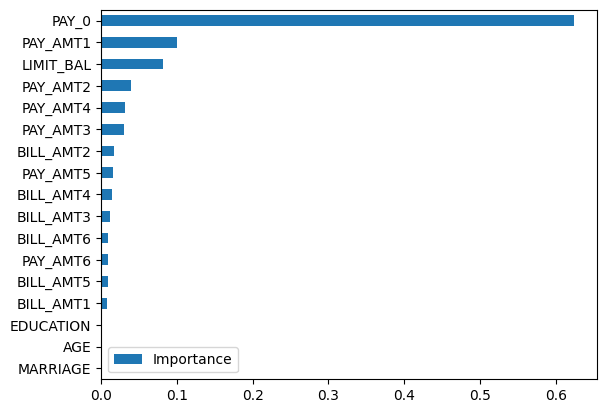

**H√¨nh 2.4**: Bi·ªÉu ƒë·ªì hi·ªÉn th·ªã m·ª©c ƒë·ªô quan tr·ªçng c·ªßa t·ª´ng feature trong m√¥ h√¨nh Random Forest t·ªëi ∆∞u.

In [19]:
# {'n_estimators': 50}
cv_rf_ex.best_params_

# the feature names and importances
feat_imp_df = pd.DataFrame({
    'Importance': cv_rf_ex.best_estimator_.feature_importances_},
    index=features_response[:-1]
)

feat_imp_df.sort_values('Importance', ascending=True).plot.barh()

# üíæ L∆∞u ·∫£nh tr∆∞·ªõc khi hi·ªÉn th·ªã
plt.savefig("feature_importance.png", dpi=300, bbox_inches='tight')

plt.show()

from IPython.display import Markdown, display
display(Markdown("**H√¨nh 2.4**: Bi·ªÉu ƒë·ªì hi·ªÉn th·ªã m·ª©c ƒë·ªô quan tr·ªçng c·ªßa t·ª´ng feature trong m√¥ h√¨nh Random Forest t·ªëi ∆∞u."))

### 2.1.3. B√†i t·∫≠p th·ª±c h√†nh 1
X√¢y d·ª±ng c√¢y quy·∫øt ƒë·ªãnh v√† r·ª´ng c√¢y tr√™n d·ªØ li·ªáu Titanic l·∫•y t·ª´ 
---
**Ngu·ªìn d·ªØ li·ªáu:** [https://www.kaggle.com/code/dmilla/introduction-to-decision-trees-titanic-dataset](https://www.kaggle.com/code/dmilla/introduction-to-decision-trees-titanic-dataset)

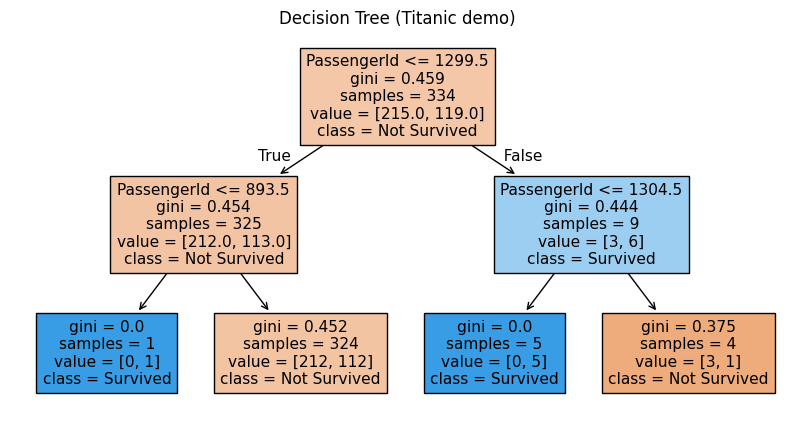

**H√¨nh 1**: C√¢y quy·∫øt ƒë·ªãnh hu·∫•n luy·ªán t·ª´ d·ªØ li·ªáu Titanic demo.

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import tree
import matplotlib.pyplot as plt
from IPython.display import Markdown, display

# 1. ƒê·ªçc d·ªØ li·ªáu
df = pd.read_csv("gender_submission.csv")

# G·∫Øn nh√£n
X = df[['PassengerId']].values
y = df['Survived'].values

# 2. Chia train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=24)

# 3. Hu·∫•n luy·ªán Decision Tree
dt = tree.DecisionTreeClassifier(max_depth=2, random_state=24)
dt.fit(X_train, y_train)

# 4. V·∫Ω c√¢y quy·∫øt ƒë·ªãnh
plt.figure(figsize=(10,5))
tree.plot_tree(dt, feature_names=['PassengerId'],
               class_names=['Not Survived','Survived'],
               filled=True)
plt.title("Decision Tree (Titanic demo)")
plt.savefig("decision_tree_titanic.png", dpi=300, bbox_inches='tight')
plt.show()

display(Markdown("**H√¨nh 1**: C√¢y quy·∫øt ƒë·ªãnh hu·∫•n luy·ªán t·ª´ d·ªØ li·ªáu Titanic demo."))

Fitting 4 folds for each of 10 candidates, totalling 40 fits


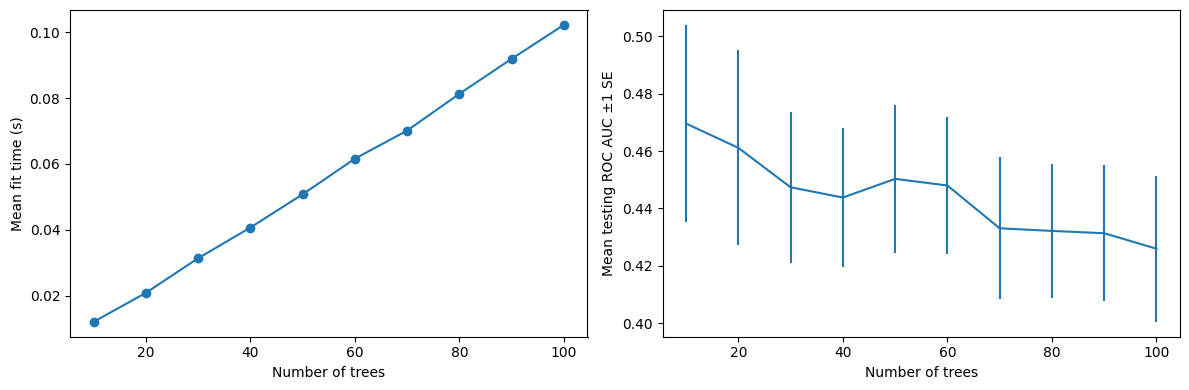

**H√¨nh 3**: Bi·ªÉu ƒë·ªì m·ªëi quan h·ªá gi·ªØa s·ªë c√¢y trong Random Forest v·ªõi th·ªùi gian hu·∫•n luy·ªán v√† ROC AUC.

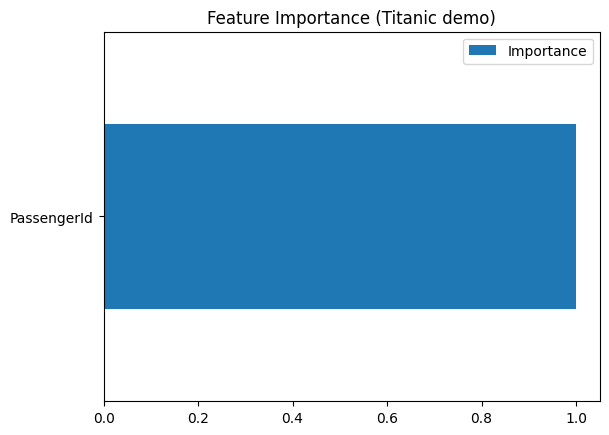

**H√¨nh 4**: Bi·ªÉu ƒë·ªì m·ª©c ƒë·ªô quan tr·ªçng c·ªßa ƒë·∫∑c tr∆∞ng trong Random Forest.

In [22]:
from sklearn.ensemble import RandomForestClassifier

# --- 1. Kh·ªüi t·∫°o m√¥ h√¨nh Random Forest ---
rf = RandomForestClassifier(max_depth=3, random_state=4)

# --- 2. GridSearchCV ƒë·ªÉ t√¨m s·ªë c√¢y t·ªëi ∆∞u ---
rf_params = {'n_estimators': list(range(10,110,10))}
cv_rf = GridSearchCV(rf, param_grid=rf_params,
                     scoring='roc_auc', cv=4,
                     return_train_score=True, verbose=1)
cv_rf.fit(X_train, y_train)

# --- 3. V·∫Ω bi·ªÉu ƒë·ªì s·ªë c√¢y vs th·ªùi gian + ROC AUC ---
cv_rf_results_df = pd.DataFrame(cv_rf.cv_results_)

fig, axs = plt.subplots(1,2, figsize=(12,4))
axs[0].plot(cv_rf_results_df['param_n_estimators'], cv_rf_results_df['mean_fit_time'], '-o')
axs[0].set_xlabel('Number of trees')
axs[0].set_ylabel('Mean fit time (s)')

axs[1].errorbar(cv_rf_results_df['param_n_estimators'],
                cv_rf_results_df['mean_test_score'],
                yerr=cv_rf_results_df['std_test_score']/4**0.5)
axs[1].set_xlabel('Number of trees')
axs[1].set_ylabel('Mean testing ROC AUC ¬±1 SE')

plt.tight_layout()
plt.savefig("random_forest_titanic.png", dpi=300, bbox_inches='tight')
plt.show()

display(Markdown("**H√¨nh 3**: Bi·ªÉu ƒë·ªì m·ªëi quan h·ªá gi·ªØa s·ªë c√¢y trong Random Forest v·ªõi th·ªùi gian hu·∫•n luy·ªán v√† ROC AUC."))

# --- 4. Feature Importance ---
feat_imp_df = pd.DataFrame({
    'Importance': cv_rf.best_estimator_.feature_importances_
}, index=['PassengerId'])

feat_imp_df.sort_values('Importance', ascending=True).plot.barh()
plt.title("Feature Importance (Titanic demo)")
plt.savefig("feature_importance_titanic.png", dpi=300, bbox_inches='tight')
plt.show()

display(Markdown("**H√¨nh 4**: Bi·ªÉu ƒë·ªì m·ª©c ƒë·ªô quan tr·ªçng c·ªßa ƒë·∫∑c tr∆∞ng trong Random Forest."))
